Tayyaba Bagwan        Rollno:03          practical:2                                           
Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

In [5]:
# Step 1: Load dataset from uploaded .npz file
data = np.load("/kaggle/input/dataset/imdb.npz", allow_pickle=True)
x_train, y_train = data["x_train"], data["y_train"]
x_test, y_test = data["x_test"], data["y_test"]

In [6]:
# Step 2: Limit vocabulary size and pad sequences to same length
vocab_size = 10000  # Only use the top 10,000 most frequent words
max_len = 200       # Pad or cut all reviews to 200 words

In [7]:
# Clip all word indices to be within the vocab size range
# This avoids indexing errors for words outside the top 10,000
x_train = [[min(word, vocab_size - 1) for word in seq] for seq in x_train]
x_test = [[min(word, vocab_size - 1) for word in seq] for seq in x_test]

In [8]:
# Pad all sequences to have the same length (max_len)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [9]:
# Step 3: Build the Deep Neural Network model
model = keras.Sequential([
    # Embedding layer turns word indices into dense vectors
    layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=max_len),
    
    # Flatten the 2D output of the embedding layer to 1D
    layers.Flatten(),

    # Fully connected hidden layer with ReLU activation
    layers.Dense(128, activation='relu'),
    
    # Dropout layer to prevent overfitting
    layers.Dropout(0.5),
    
    # Output layer with sigmoid for binary classification (positive/negative)
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
# Step 4: Compile the model
model.compile(
    optimizer='adam',                  # Optimizer to adjust weights
    loss='binary_crossentropy',        # Suitable loss function for binary classification
    metrics=['accuracy']               # Track accuracy during training
)

In [11]:
# Step 5: Train the model on training data
history = model.fit(
    x_train, y_train,                  # Training inputs and labels
    epochs=5,                          # Number of training cycles
    batch_size=128,                    # Number of samples per gradient update
    validation_split=0.2               # Use 20% of training data for validation
)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6696 - loss: 0.5913 - val_accuracy: 0.7908 - val_loss: 0.4647
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9199 - loss: 0.2146 - val_accuracy: 0.8508 - val_loss: 0.3575
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9817 - loss: 0.0711 - val_accuracy: 0.8152 - val_loss: 0.5046
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9967 - loss: 0.0191 - val_accuracy: 0.7530 - val_loss: 0.8333
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9990 - loss: 0.0069 - val_accuracy: 0.7230 - val_loss: 1.0789


In [17]:
review = x_test[0]
prediction = model.predict(np.array([review]))  # Predict 1 review
print("Predicted:", prediction[0][0])
print("Actual Label:", y_test[0])

#If the prediction is > 0.5 → model thinks it's positive.
#If the prediction is < 0.5 → model thinks it's negative.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted: 0.99897444
Actual Label: 1


In [ ]:
#0.99897444 is the model's confidence that the review is positive.
#Since it's very close to 1, the model is almost sure it's a positive review.
#The actual label is also 1, which means it's truly a positive review.

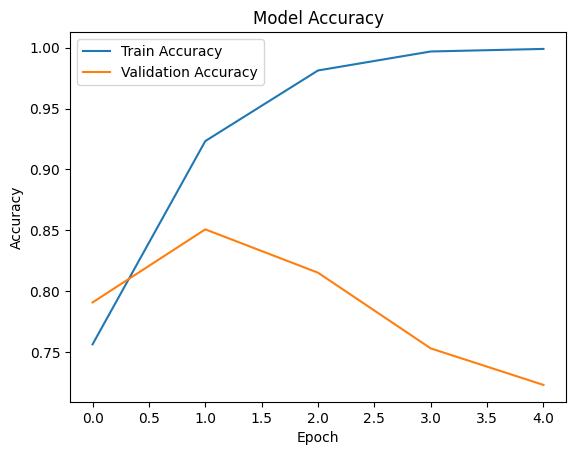

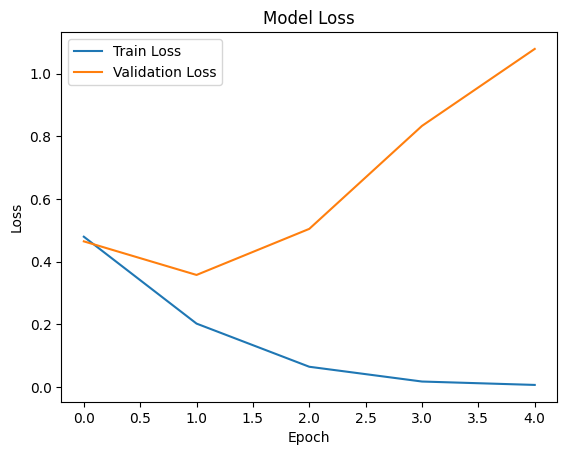

In [18]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()